 1task IRIS FLOWER CLASSIFICATION ML 



In [ ]:

from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
     

In [ ]:

iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
iris.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
species              150
dtype: int64

In [ ]:
iris.max()

sepal length (cm)          7.9
sepal width (cm)           4.4
petal length (cm)          6.9
petal width (cm)           2.5
target                     2.0
species              virginica
dtype: object

In [ ]:
iris.min()

sepal length (cm)       4.3
sepal width (cm)        2.0
petal length (cm)       1.0
petal width (cm)        0.1
target                  0.0
species              setosa
dtype: object

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species


In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

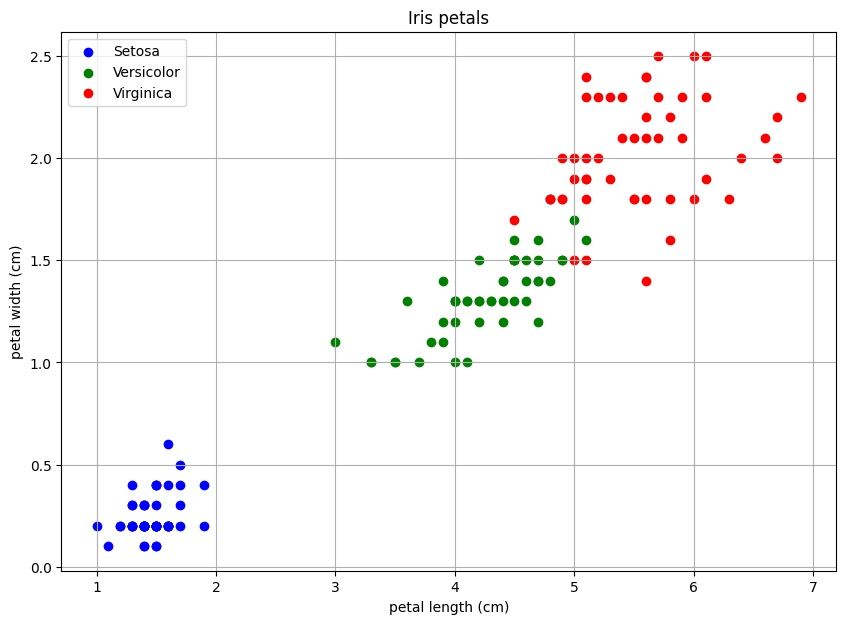

In [ ]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()


Text(0, 0.5, 'species')

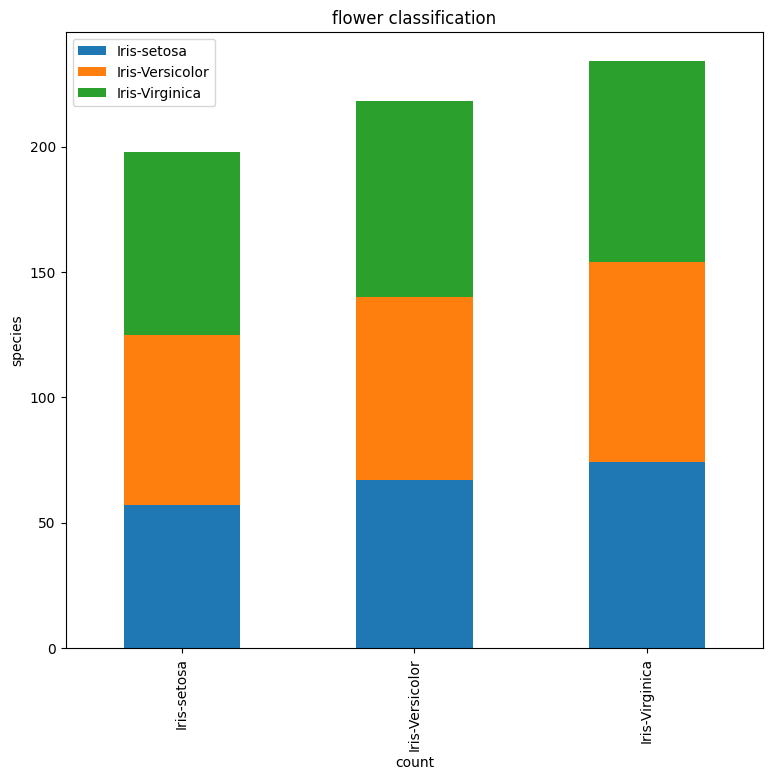

In [ ]:
plotdata = pd.DataFrame({
    "Iris-setosa":[57,67,74],
    "Iris-Versicolor":[68,73,80],
    "Iris-Virginica":[73,78,80]},
    index=["Iris-setosa", "Iris-Versicolor", "Iris-Virginica"])
plotdata.plot(kind='bar', stacked=True,figsize=(9, 8))
plt.title("flower classification")

plt.xlabel("count")

plt.ylabel("species")

In [ ]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
training_prediction = log_reg.predict(X_train)
training_prediction
     

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [ ]:

test_prediction = log_reg.predict(X_test)
test_prediction
     

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


In [ ]:

print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
